In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data\data_wasting_smote.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_3748\2876023177.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('data\data_wasting_smote.csv')


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Wasting_Normal weight,Wasting_Risk of Overweight,Wasting_Severely Underweight,Wasting_Underweight
0,0,0.791667,0.890909,0.759259,False,True,False,False
1,0,0.833333,0.638182,0.462963,False,False,False,True
2,0,0.416667,0.661818,0.574074,False,True,False,False
3,1,0.083333,0.140000,0.450617,False,True,False,False
4,1,0.208333,0.250909,0.611111,False,True,False,False


In [ ]:
x = df.drop(['Wasting_Normal weight', 'Wasting_Risk of Overweight', 'Wasting_Severely Underweight', 'Wasting_Underweight' ], axis =1)
y = df[['Wasting_Normal weight', 'Wasting_Risk of Overweight', 'Wasting_Severely Underweight', 'Wasting_Underweight' ]]

X_train_wt, X_test_wt, y_train_wt, y_test_wt = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print ("Jumlah data latih Wasting:", len(y_train_wt))
print ("Jumlah data uji Wasting:", len(y_test_wt))



Jumlah data latih Wasting: 124307
Jumlah data uji Wasting: 31077


In [ ]:
np.save('data/X_test.npy', X_test_wt)
np.save('data/y_test.npy', y_test_wt)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_wasting = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_wt.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  
])

model_wasting.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

model_wasting.summary()


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,156 (35.77 KB)

 Trainable params: 9,156 (35.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import Callback
class StopAtAccuracy(Callback):
    def __init__(self, target=0.9):
        super(StopAtAccuracy, self).__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')  
        if accuracy is not None:
            if accuracy >= self.target:
                print(f"\nAkurasi sudah mencapai {accuracy:.4f}, training dihentikan.")
                self.model.stop_training = True

stop_callback = StopAtAccuracy(target=0.95)

history_wasting = model_wasting.fit(
    X_train_wt, y_train_wt,
    epochs=50,
    validation_split=0.2,
    callbacks=[stop_callback]
)


Epoch 1/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - accuracy: 0.7240 - loss: 0.6405 - val_accuracy: 0.9519 - val_loss: 0.1493
Epoch 2/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - accuracy: 0.9175 - loss: 0.2081 - val_accuracy: 0.9444 - val_loss: 0.1248
Epoch 3/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9395 - loss: 0.1543 - val_accuracy: 0.9741 - val_loss: 0.0771
Epoch 4/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.9456 - loss: 0.1360 - val_accuracy: 0.9750 - val_loss: 0.0757
Epoch 5/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.9485 - loss: 0.1289 - val_accuracy: 0.9825 - val_loss: 0.0615
Epoch 6/50
3105/3108 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9542 - loss: 0.1172
Akurasi sudah mencapai 0.9530, training dihentikan.
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - accuracy: 0.9542 - loss: 0.1172 - val_accuracy: 0.9755 - val_loss: 0.0701


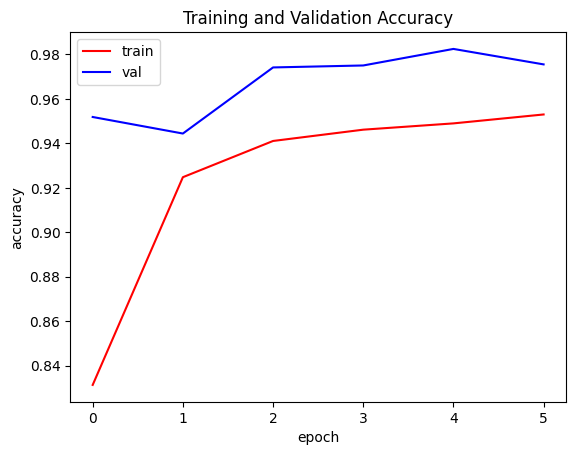

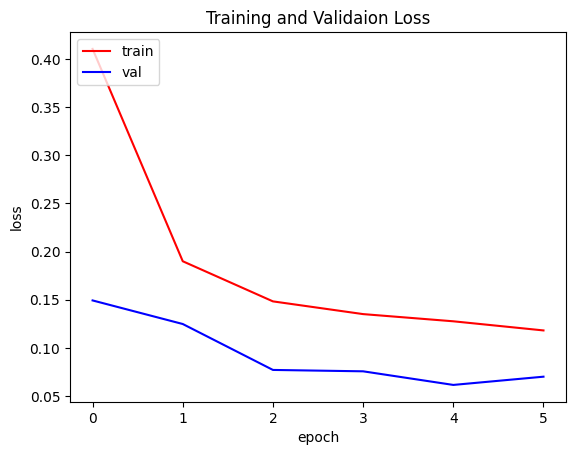

In [ ]:
import matplotlib.pyplot as plt

acc = history_wasting.history['accuracy']
val_acc = history_wasting.history['val_accuracy']
loss = history_wasting.history['loss']
val_loss = history_wasting.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()